**COVID19 prediction using ML**

---












The COVID-19 pandemic has caused significant disruption globally, and the situation continues to evolve. The analysis and prediction of COVID-19 spread are essential for effective public health policies and prevention strategies. This project aims to analyze COVID-19 data from various sources and develop models to predict the future spread of the virus.


**Dataset:**
The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Data from 11th March to 15th April was used for training and validation and the data from 16th April to 30th April was used as test set.
                   
Dataset contains symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature. Details of the columns are :

**A. Basic information:**

ID (Individual ID)

Sex (male/female).

Age ≥60 above years (true/false)

Test date (date when tested for COVID)


**B. Symptoms:**

Cough (true/false).

Fever (true/false).

Sore throat (true/false).

Shortness of breath (true/false).

Headache (true/false).


**C. Other information:**

Known contact with an individual confirmed to have COVID-19 (Abroad/Confirmed/other).

**D. Covid report**

Corona positive or negative


# **Capstone Project Theory**

**Section 1:**

1. The proposed models are important in today’s world in predicting
  covid19 disease accurately. It is observed that the proposed models yields high accuracy for short term prediction with error less than 3% for daily predictions and less than 8% for weekly predictions.


2. Prediction models were built to measure the chance of infection based
  on the different parameters collected as a part of the screening test. These are intended to assist medical practitioners all around the world in treating patients.

3. The propose methods can be used in predicting cancer not only covid.ML is used in various medical fields, to predict disease and forecast its outcome.  

**Section 2**:

Few assumptions were tested in Hypothesis step, 4 models were trained and tested here and out of which 3 models RandomForestclassifier,Decisiontreeclassifier and SVM prooved to be working same after comparing accuracy,performance scores and performing cost  function of classification models      
 i.e.. cross-entropy value.
           -\frac{1}{N}\Sigma_{i=1}^N(y_i.log(p_i) + (1-y_i)log(1-p_i))     
where
yi – truel label for instance i,
pi – predicted probability, for instance, i by the model



**Section 3**:

1. To prove/Disprove the Hypothesis, since the input and the target variables are categorical, Chi2 test is performed to find the p_value.

2. Feature engineering steps performed are
Data cleaning,Data transformation, Feature selection.

3. After Data cleaning,EDA is performed to visualize the relationship between each symptom and corona results.Many observations were made like
Fever,Headache,cough symptoms and known contacts with confirmed were crucial to predict covid19.

4. Important patterns were found in EDA and the observations made were justified in the Feature selection process by finding the chi scores and p values of each input feature.

**Section 4**:

1. The methods used in ML for predicting Covid19 are Data cleaning,EDA,Training 4 models,Feature selection,Hypothesis testing,predicting on Test data and finally evaluating the algorithms and comparing the accuracy score of each model.

2. RandomForestclassifier,Decisiontreeclassifier and SVM prooved to be working same after comparing accuracy,performance scores and performing cost  function of classification models      
 i.e.. cross-entropy value.
           -\frac{1}{N}\Sigma_{i=1}^N(y_i.log(p_i) + (1-y_i)log(1-p_i))     
where
yi – truel label for instance i,
pi – predicted probability, for instance, i by the model

3. k-Fold Cross-Validation is done on the training set to improve the accuracy of the models in Validation step.

4. models are compared by plotting the roc curves and finding out the performance score like accuracy,precision ,recall,f-1 scores,FNR values.

**Note**: SQL part is done in the **SQL Queries** step after cleaning of data.

# **Data Understanding**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [105]:
df=pd.read_csv("/content/corona_tested.csv")
print(df.head())
df['Known_contact'].unique()

   Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed  


array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [106]:
df.shape

(278848, 11)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [108]:
df['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [109]:
#Coverting the Upper case entries to lower case
def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [110]:
df['Cough_symptoms'] = df['Cough_symptoms'].map(convert)
df['Fever'] = df['Fever'].map(convert)
df['Sore_throat'] = df['Sore_throat'].map(convert)
df['Shortness_of_breath'] = df['Shortness_of_breath'].map(convert)
df['Headache'] = df['Headache'].map(convert)

In [111]:
df.rename(columns={'Sex':'Gender'},inplace=True)

In [112]:
df['Test_date'] = pd.to_datetime(df['Test_date'])

# **DATA CLEANING**

In [113]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,2020-11-03,true,false,true,false,false,negative,None,None,Abroad
1,2,2020-11-03,false,true,false,false,false,positive,None,None,Abroad
2,3,2020-11-03,false,true,false,false,false,positive,None,None,Abroad
3,4,2020-11-03,true,false,false,false,false,negative,None,None,Abroad
4,5,2020-11-03,true,false,false,false,false,negative,None,None,Contact with confirmed


In [114]:
df.replace({'None':np.nan},inplace=True)
df.replace({'Ab':np.nan},inplace=True)

In [115]:
# Finding the total null values
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [116]:
#To know the percentage of null values
for i in df.columns:
    print(f"{i} has",round(df[i].isnull().sum()*100/df.shape[0],5),"%")

Ind_ID has 0.0 %
Test_date has 0.0 %
Cough_symptoms has 0.09037 %
Fever has 0.09037 %
Sore_throat has 0.00036 %
Shortness_of_breath has 0.00036 %
Headache has 0.00036 %
Corona has 0.0 %
Age_60_above has 45.65928 %
Gender has 7.01565 %
Known_contact has 0.0 %


In [117]:
#dropping nan rows for columns having less than 1% nan
df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Known_contact'],axis=0,inplace=True)

In [118]:

df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,2020-11-03,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,2020-11-03,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,2020-11-03,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,2020-11-03,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,2020-11-03,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed


In [119]:
df.replace({'other':np.nan},inplace=True)

df.dropna(subset=['Corona'],axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               274702 non-null  int64         
 1   Test_date            274702 non-null  datetime64[ns]
 2   Cough_symptoms       274702 non-null  object        
 3   Fever                274702 non-null  object        
 4   Sore_throat          274702 non-null  object        
 5   Shortness_of_breath  274702 non-null  object        
 6   Headache             274702 non-null  object        
 7   Corona               274702 non-null  object        
 8   Age_60_above         149043 non-null  object        
 9   Gender               255668 non-null  object        
 10  Known_contact        274702 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 25.1+ MB


In [120]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Gender                  19034
Known_contact               0
dtype: int64

In [121]:
data=df.drop(['Age_60_above'],axis=1)   #copying the cleaned data from 'df' to 'data' without 'age_60_above' feature

In [122]:
data['Corona'].unique


<bound method Series.unique of 0         negative
1         positive
2         positive
3         negative
4         negative
            ...   
278843    positive
278844    negative
278845    negative
278846    negative
278847    negative
Name: Corona, Length: 274702, dtype: object>

In [123]:
#Encoding
data['Cough_symptoms']=pd.get_dummies(data['Cough_symptoms'],drop_first=True)
data['Fever']=pd.get_dummies(data['Fever'],drop_first=True)
data['Sore_throat']=pd.get_dummies(data['Sore_throat'],drop_first=True)
data['Shortness_of_breath']=pd.get_dummies(data['Shortness_of_breath'],drop_first=True)
data['Headache']=pd.get_dummies(data['Headache'],drop_first=True)
data['Corona']=pd.get_dummies(data['Corona'],drop_first=True)

In [124]:
data['Gender'].replace({'male':0,'female':1},inplace=True)
data['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

# **SQL queries**

In [204]:
import duckdb
conn=duckdb.connect()
conn.register('df',df)


In [205]:
conn.execute("select * from df").fetchdf().head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,2020-11-03,true,false,true,false,false,negative,None,None,Abroad
1,2,2020-11-03,false,true,false,false,false,positive,None,None,Abroad
2,3,2020-11-03,false,true,false,false,false,positive,None,None,Abroad
3,4,2020-11-03,true,false,false,false,false,negative,None,None,Abroad
4,5,2020-11-03,true,false,false,false,false,negative,None,None,Contact with confirmed


In [206]:
#1...Find the number of corona patients who faced shortness of breath.

conn.execute("select count(Ind_ID) from df where Shortness_of_breath=='true' ").fetchdf()

,count(Ind_ID)
0,1546


In [207]:
#2...Find the number of negative corona patients who have fever and sore_throat.
conn.execute("select count(Ind_ID) from df where Fever=='true' AND Sore_throat=='true' AND Corona =='negative' ").fetchdf()

,count(Ind_ID)
0,121


In [208]:
#3..Group the data by month and rank the number of positive cases.
conn.execute("select count(*) as Positive_cases, month(Test_date) from df where Corona == 'positive' group by month(Test_date) order by Positive_cases desc").fetchdf()


,Positive_cases,month(Test_date)
0,6258,3
1,4182,4
2,681,1
3,615,2
4,505,5
5,483,7
6,394,6
7,356,10
8,329,11
9,329,12


In [209]:
#4...Find the female negative corona patients who faced cough and headache.
conn.execute("select Ind_ID,Gender,Cough_symptoms,Headache from df where Cough_symptoms=='true' AND Headache=='true' AND Corona =='negative' AND Gender=='female' ").fetchdf()

,Ind_ID,Gender,Cough_symptoms,Headache
0,13756,female,true,true
1,17289,female,true,true
2,17657,female,true,true
3,19554,female,true,true
4,19615,female,true,true
5,20248,female,true,true
6,20253,female,true,true
7,37904,female,true,true
8,40616,female,true,true
9,40752,female,true,true


In [210]:
#5...How many elderly corona patients have faced breathing problems?
conn.execute("select count(Age_60_above) from df where Shortness_of_breath=='true' ").fetchdf()

,count(Age_60_above)
0,1259


In [269]:
#6...Which three symptoms were more common among COVID positive patients?
conn.execute("select count(Ind_ID) from df where Corona == 'positive' AND Cough_symptoms == 'true'").fetchdf()  #6582

conn.execute("select count(Ind_ID) from df where Fever=='true' AND Corona =='positive'").fetchdf() #5558

conn.execute("select count(Ind_ID) from df  where Corona = 'positive' and Sore_throat = 'true'").fetchdf() #1523
conn.execute("select count(Ind_ID) from df where Corona = 'positive' and Shortness_of_breath = 'true'").fetchdf()#1162
conn.execute("select count(Ind_ID) from df  where Corona = 'positive' and Headache = 'true'").fetchdf()#2230




,count(Ind_ID)
0,2230


Cough_symptoms:6582

Shortness_of_breadth:1162

Fever:5558

Sore_throat:1523

Headache:2230

From observing the counts we can find that Cough_symptoms, Fever and Headache are the
more common symptoms in covid positive patients.

In [281]:
#7...Which symptom was less common among COVID negative people?
conn.execute("select count(Ind_ID) from df where Corona == 'negative' AND Cough_symptoms == 'true'").fetchdf() #34987
conn.execute("select count(Ind_ID) from df where Fever=='true' AND Corona =='negative'").fetchdf() #15816
conn.execute("select count(Ind_ID) from df where Sore_throat=='true' AND Corona =='negative'").fetchdf()#365
conn.execute("select count(Ind_ID) from df where Corona = 'negative' and Shortness_of_breath = 'true'").fetchdf()#384
conn.execute("select count(Ind_ID) from df  where Corona = 'negative' and Headache = 'true'").fetchdf()#147

,count(Ind_ID)
0,147


Cough_symptoms:34987

Shortness_of_breadth:384

Fever:15816

Sore_throat:365

Headache:147

By observing the counts in every case, we can find that Headache was the less common symptom in covid negative people.

In [280]:
#8...What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("select count(Ind_ID) from df where Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad' and Shortness_of_breath = 'true'").fetchdf()#84
conn.execute("select count(Ind_ID) from df where Gender= 'male' and Corona = 'positive' and Known_contact = 'Abroad' and Cough_symptoms = 'true'").fetchdf()#532
conn.execute("select count(Ind_ID) from df where Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad' and Fever = 'true'").fetchdf()#407#conn.execute("select count(Ind_ID) from df where Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad' and Headache = 'true'").fetchdf()#129
conn.execute("select count(Ind_ID) from df where Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad' and Sore_throat = 'true'").fetchdf()#87

,count(Ind_ID)
0,84


Cough_symptoms:532

Shortness_of_breadth:84

Fever:407

Sore_throat:84

Headache:129

From observing the counts we can find that Cough_symptoms, Fever and Headache are the
more common symptoms among COVID positive males whose known contact was abroad

# **EDA**

false    233133
true      41569
Name: Cough_symptoms, dtype: int64


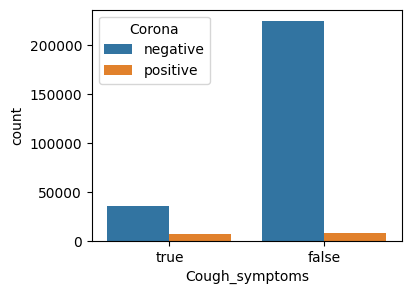

In [214]:
plt.figure(figsize=(4,3))
print(df['Cough_symptoms'].value_counts())
sns.countplot(x='Cough_symptoms',hue='Corona',data=df)
plt.show()

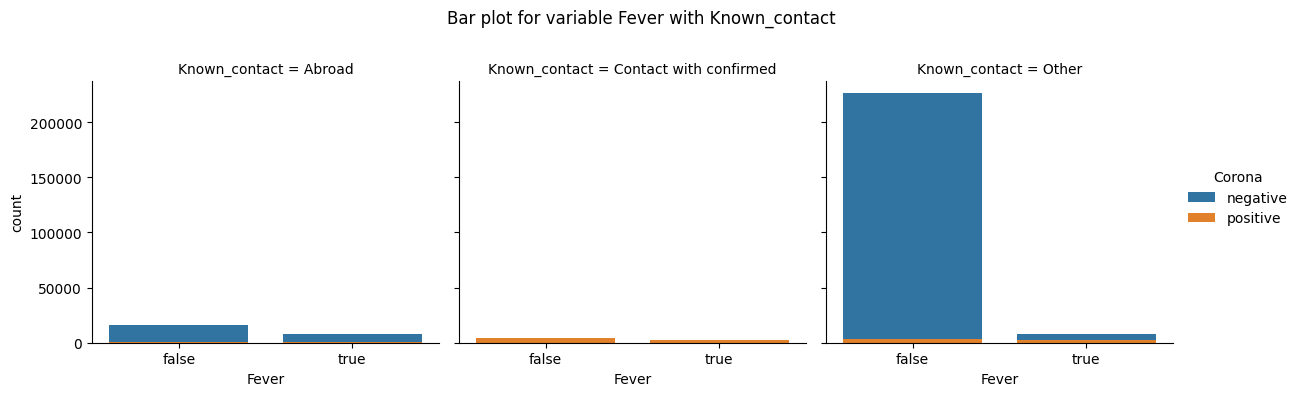

In [215]:
# Creating the facetgrid.
graph = sns.FacetGrid(df, col= 'Known_contact', hue= 'Corona', height= 4, aspect= 1)
# Mapping the attributes with facetgrid
graph.map(sns.countplot,'Fever').add_legend()
# Adding title
graph.fig.suptitle('Bar plot for variable Fever with Known_contact')
graph.fig.subplots_adjust(top= 0.8)

Observation: Irrespective of the fever condition, if a person is having a contact with an infected person then he is more likely to be found positive in the test

false    272814
true       1888
Name: Sore_throat, dtype: int64


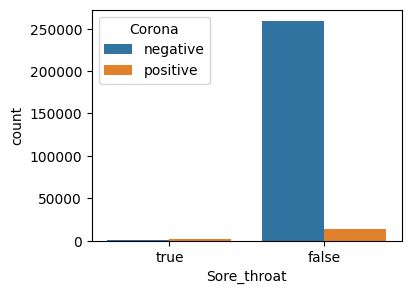

In [216]:
plt.figure(figsize=(4,3))
print(df['Sore_throat'].value_counts())
sns.countplot(x='Sore_throat',hue='Corona',data=df)
plt.show()

In [217]:
pd.crosstab(df['Corona'], df['Shortness_of_breath'])


Shortness_of_breath,false,true
Corona,,
negative,259624,384
positive,13532,1162


Observation:If a person experiences shortness of breath then there's a chance to be found covid positive. But in the given dataset, very few cases with Shortness_of_breath = True were found.

false    273156
true       1546
Name: Shortness_of_breath, dtype: int64


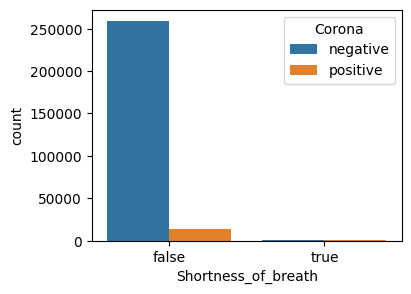

In [218]:
plt.figure(figsize=(4,3))
print(df['Shortness_of_breath'].value_counts())
sns.countplot(x='Shortness_of_breath',hue='Corona',data=df)
plt.show()

false    272325
true       2377
Name: Headache, dtype: int64


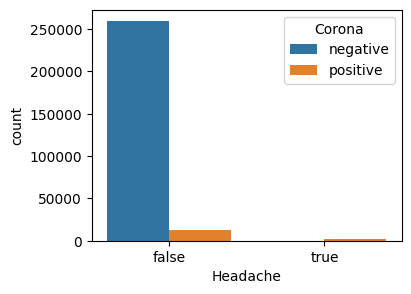

In [219]:
plt.figure(figsize=(4,3))
print(df['Headache'].value_counts())
sns.countplot(x='Headache',hue='Corona',data=df)
plt.show()

Observation: Suffering with Headache is also an important parameter to find the covid positive patients.

Other                     239167
Abroad                     25068
Contact with confirmed     10467
Name: Known_contact, dtype: int64


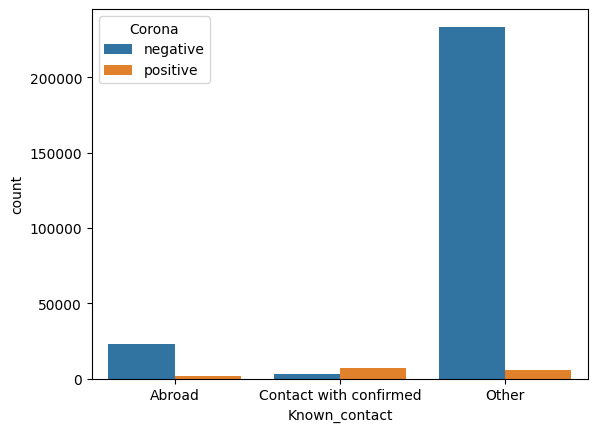

In [220]:
#plt.figure(figsize=(4,3))
print(df['Known_contact'].value_counts())
sns.countplot(x='Known_contact',hue='Corona',data=df)
plt.show()

Observations in EDA




1.The dataset is an unbalanced dataset with few cases as positive for target variable(Corona).

2.If a person is in contact with an infected person, then there is more chance of found to be positive in the test.

3.Cough_symptoms, fever, Headache are found to be more prevalent in covid positive people.

4.People with symptoms like sore throat, shortness of breath have higher chances of found to be covid positive.

5.People with fever, cough along with other symptoms are more likely to be found positive.

### **Imputation**

In [282]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Gender                 0
Known_contact          0
dtype: int64

In [283]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Gender,Known_contact
0,1,2020-11-03,1,0,1,0,0,0,1,0
1,2,2020-11-03,0,1,0,0,0,1,1,0
2,3,2020-11-03,0,1,0,0,0,1,1,0
3,4,2020-11-03,1,0,0,0,0,0,1,0
4,5,2020-11-03,1,0,0,0,0,0,1,1


In [284]:
#univariate imputation
mode_gender=data['Gender'].mode()[0]
#print(df['Gender'].mode())
data['Gender'].fillna(mode_gender, inplace=True)

In [285]:
data['Gender']=data['Gender'].astype(int)
data['Gender'].value_counts()

1    147447
0    127255
Name: Gender, dtype: int64

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               274702 non-null  int64         
 1   Test_date            274702 non-null  datetime64[ns]
 2   Cough_symptoms       274702 non-null  uint8         
 3   Fever                274702 non-null  uint8         
 4   Sore_throat          274702 non-null  uint8         
 5   Shortness_of_breath  274702 non-null  uint8         
 6   Headache             274702 non-null  uint8         
 7   Corona               274702 non-null  uint8         
 8   Gender               274702 non-null  int64         
 9   Known_contact        274702 non-null  int64         
dtypes: datetime64[ns](1), int64(3), uint8(6)
memory usage: 12.1 MB


Total 274702 rows are considered for study after Data cleaning

# **Training Data selection**

In [287]:
#11th March till 15th April as a training and validation set.
training_set = data.loc['11-03-2020':'15-04-2020']
print(training_set)

        Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
1100      1101 2020-03-13               0      0            1   
1101      1102 2020-03-13               1      0            0   
1102      1103 2020-03-13               1      1            0   
1103      1104 2020-03-13               1      1            0   
1104      1105 2020-03-13               1      1            0   
...        ...        ...             ...    ...          ...   
149995  149996 2020-04-14               1      0            0   
149996  149997 2020-04-14               1      0            0   
149997  149998 2020-04-14               0      1            0   
149998  149999 2020-04-14               1      0            0   
149999  150000 2020-04-14               1      0            0   

        Shortness_of_breath  Headache  Corona  Gender  Known_contact  
1100                      0         0       0       1              2  
1101                      0         0       0       1              0  
1102  

**Store features in Matrix X and Target in Vector y**

In [288]:
from sklearn.feature_selection import chi2
X=training_set.drop(columns=['Corona','Ind_ID','Test_date'],axis=1)
y=training_set['Corona']
X

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Gender,Known_contact
1100,0,0,1,0,0,1,2
1101,1,0,0,0,0,1,0
1102,1,1,0,1,0,1,0
1103,1,1,0,0,0,1,0
1104,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...
149995,1,0,0,0,0,0,2
149996,1,0,0,0,0,1,0
149997,0,1,0,0,0,0,2
149998,1,0,0,0,0,1,0


# **Feature Selection**

In [289]:
#Input and output variables are categorical
chi_scores=chi2(X,y)


In [290]:
print(chi_scores)

(array([ 6447.94044398, 15366.6001878 , 14963.83855762, 10620.70975909,
       24688.56760553,    88.53834304,  1912.01998173]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.98590101e-21, 0.00000000e+00]))


<Axes: >

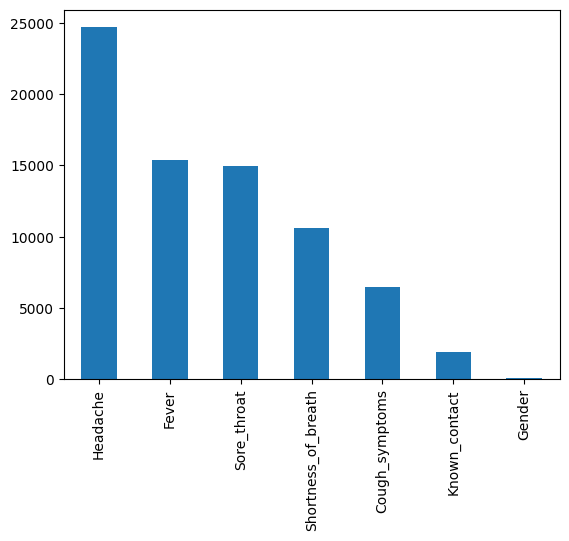

In [291]:
#Higher the chi value higher the importance
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

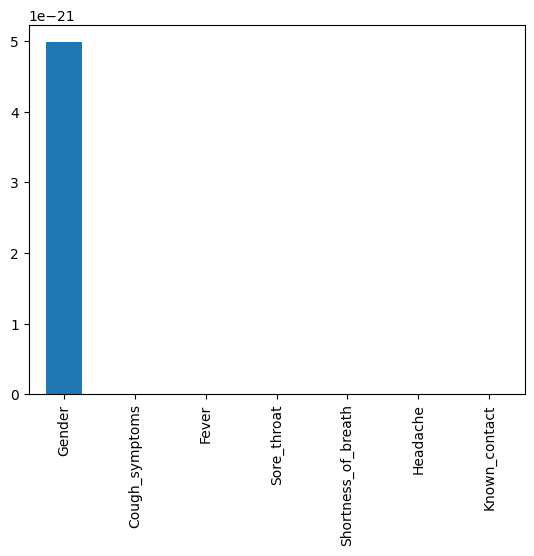

In [292]:
#Lower the p value,higher the important are features
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

Observation: Gender feature can be eliminated and 6 other features can be used fro training and testing

In [293]:
X=training_set.drop(columns=['Corona','Ind_ID','Test_date','Gender'],axis=1) #dropping Gender feature after feature selection


# **Hypothesis Testing**



**Hypothesis 1**

H 0 : **Corona results and Known_contacts with confirmed patients are not correlated**

H a:Corona results and Known_contacts with confirmed patients are highly correlated

Where:


α = 0.05 (95% Confidence Interval)

In [294]:
dataset_table=pd.crosstab(training_set['Corona'],training_set['Known_contact'])
print(dataset_table)

Known_contact      0     1       2
Corona                            
0              13440  2461  119092
1               1702  5457    4187


In [295]:
dataset_table.values

array([[ 13440,   2461, 119092],
       [  1702,   5457,   4187]])

In [296]:
#observed value
Observed_values=dataset_table.values
print("Observed values:-\n",Observed_values)

Observed values:-
 [[ 13440   2461 119092]
 [  1702   5457   4187]]


In [297]:
import scipy.stats as stats
val=stats.chi2_contingency(dataset_table)



In [298]:
val

Chi2ContingencyResult(statistic=44948.14968729579, pvalue=0.0, dof=2, expected_freq=array([[ 13968.00583576,   7304.099208  , 113720.89495623],
       [  1173.99416424,    613.900792  ,   9558.10504377]]))

In [299]:
Expected_Values=val[3]

In [300]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha=0.05

Degree of Freedom:- 2


In [301]:
alpha=0.05
ddof=2

In [302]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]


In [303]:
print("Chi_square statistic:-",chi_square_statistic)

Chi_square statistic:- 41676.21725196533


In [305]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print("p_value:",p_value)
print("significance_level:",alpha)
print("Degree of freedom:",ddof)


p_value: 0.0
significance_level: 0.05
Degree of freedom: 2


In [244]:
if(p_value<alpha):
 print("Reject Null Hypothesis as there is a strong correlation between corona results and known_contact with confirmed patients")
else:
  print("Accept Null Hypothesis as there is no strong correlation between the two categories")


Reject Null Hypothesis as there is a strong correlation between corona results and known_contact with confirmed patients


 **Hypothesis 2**

H 0 : **Corona results and Headache symptom are not correlated**

H a:Corona results and Headache symptom are highly correlated

Where:

α = 0.05 (95% Confidence Interval)

In [306]:
dataset_table1=pd.crosstab(training_set['Corona'],training_set['Headache'])
print(dataset_table)

Known_contact      0     1       2
Corona                            
0              13440  2461  119092
1               1702  5457    4187


In [308]:
dataset_table1.values

array([[134872,    121],
       [  9137,   2209]])

In [309]:
#observed value
observed_values=dataset_table1.values
print("Observed values:-\n",observed_values)

Observed values:-
 [[134872    121]
 [  9137   2209]]


In [310]:
import scipy.stats as stats
value=stats.chi2_contingency(dataset_table1)



In [311]:
value

Chi2ContingencyResult(statistic=25075.650219857154, pvalue=0.0, dof=1, expected_freq=array([[132843.65027095,   2149.34972905],
       [ 11165.34972905,    180.65027095]]))

In [312]:
expected_values=val[2]

In [313]:
no_of_rows=len(dataset_table1.iloc[0:2,0])
no_of_columns=len(dataset_table1.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha=0.05

Degree of Freedom:- 1


In [314]:
alpha=0.05
ddof=1

In [315]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_values,Expected_Values)])
chi_square_statistic1=chi_square[0]+chi_square[1]


In [316]:
print("Chi_square statistic:-",chi_square_statistic1)

Chi_square statistic:- 41676.21725196533


In [345]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic1,df=ddof)
print("p_value:",p_value)
print("significance_level:",alpha)
print("Degree of freedom:",ddof)


p_value: 0.0
significance_level: 0.05
Degree of freedom: 1


In [346]:
if(p_value<alpha):
 print("Reject Null Hypothesis as there is a strong correlation between corona results and Headache Symptom")
else:
  print("Accept Null Hypothesis as there is no strong correlation between the two categories")


Reject Null Hypothesis as there is a strong correlation between corona results and Headache Symptom


# **Train-Test split**

1.Split the data into 2 parts,Training set and Testing Set

2.Train the models on Training set

3.Validate the training set

4.Test the models on training set

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
106261               0      0            0                    0         0   
47060                0      0            0                    0         0   
32290                0      0            0                    0         0   
59904                0      0            0                    0         0   
143102               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
113084               0      0            0                    0         0   
122770               1      0            0                    0         0   
106481               0      0            0                    0         0   
134957               1      0            0                    0         0   
124850               0      0            0                    0         0   

        Known_contact  
106261              2  
47060               2  
322

In [321]:
y_train

106261    0
47060     0
32290     0
59904     0
143102    0
         ..
113084    0
122770    0
106481    0
134957    0
124850    0
Name: Corona, Length: 117071, dtype: uint8

In [322]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146339 entries, 1100 to 149999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               146339 non-null  int64         
 1   Test_date            146339 non-null  datetime64[ns]
 2   Cough_symptoms       146339 non-null  uint8         
 3   Fever                146339 non-null  uint8         
 4   Sore_throat          146339 non-null  uint8         
 5   Shortness_of_breath  146339 non-null  uint8         
 6   Headache             146339 non-null  uint8         
 7   Corona               146339 non-null  uint8         
 8   Gender               146339 non-null  int64         
 9   Known_contact        146339 non-null  int64         
dtypes: datetime64[ns](1), int64(3), uint8(6)
memory usage: 6.4 MB


**Import the models**

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix

# **Model Training**

Models:

1.RandomForestClassifier

2.DecisionTreeClassifier

3.Adaboost classifier

4.Support Vector Machine Classifier


In [324]:
rf=RandomForestClassifier()    #1.RandomForestClassifier
rf.fit(X_train,y_train)

dt = DecisionTreeClassifier()   #2.DecisionTreeClassifier
dt.fit(X_train, y_train)

adaboost = AdaBoostClassifier()  #3.Adaboost classifier
adaboost.fit(X_train,y_train)

svc = SVC()                      # 4.Support Vector Machine Classifier
svc.fit(X_train,y_train)


SVC()

In [325]:
y_pred1=rf.predict(X_test)
y_pred2=dt.predict(X_test)
y_pred3=adaboost.predict(X_test)
y_pred4=svc.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'rf':y_pred1,'dt':y_pred2,'adaboost':y_pred3,'svc':y_pred4})
df1.head(10)


,Actual,rf,dt,adaboost,svc
3318,0,0,0,0,0
25807,0,0,0,0,0
114569,0,0,0,0,0
69715,0,0,0,0,0
99223,0,0,0,0,0
14083,0,0,0,0,0
37819,0,0,0,0,0
42093,0,0,0,0,0
24577,0,0,0,0,0
32098,0,0,0,0,0


**Accuracy scores of all the models**

In [326]:
acc_rf=accuracy_score(y_test,y_pred1)
print("Model 1 accuracy score",acc_rf*100)
acc_dt=accuracy_score(y_test,y_pred2)
print("Model 2 accuracy score",acc_dt*100)
acc_adaboost=accuracy_score(y_test,y_pred3)
print("Model 3 accuracy score",acc_adaboost*100)
acc_svc=accuracy_score(y_test,y_pred4)
print("Model 4 accuracy score",acc_svc*100)

Model 1 accuracy score 95.62320623206232
Model 2 accuracy score 95.61637283039497
Model 3 accuracy score 94.48544485444855
Model 4 accuracy score 95.61978953122865


# **Cross Validation**

In [327]:
from sklearn.model_selection import cross_val_score
#for RandomForestClassifier

cv_score_rf=cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=5),X,y,cv=5)
print(cv_score_rf)
mean_accuracy_rf=sum(cv_score_rf)/len(cv_score_rf)
mean_accuracy_rf=round(mean_accuracy_rf,2)
print("Model 1 accuracy: ",mean_accuracy_rf)

#for DecisionTreeClassifier
cv_score_dt=cross_val_score(DecisionTreeClassifier(),X, y, cv=5)
print(cv_score_dt)
mean_accuracy_dt=sum(cv_score_dt)/len(cv_score_dt)
mean_accuracy_dt=round(mean_accuracy_dt,2)
print("Model 2 accuracy: ",mean_accuracy_dt)

#for Adaboost classifier
cv_score_ad=cross_val_score(AdaBoostClassifier(),X, y, cv=5)
print(cv_score_ad)
mean_accuracy_ad=sum(cv_score_ad)/len(cv_score_ad)
mean_accuracy_ad=round(mean_accuracy_ad,2)
print("Model 3 accuracy: ",mean_accuracy_ad)

#for Support Vector Machine Classifier
cv_score_svc=cross_val_score(SVC(kernel='linear'),X, y, cv=5)
print(cv_score_svc)
mean_accuracy_svc=sum(cv_score_svc)/len(cv_score_svc)
mean_accuracy_svc=round(mean_accuracy_svc,2)
print("Model 4 accuracy: ",mean_accuracy_svc)

[0.94615279 0.95131201 0.9595121  0.95397704 0.94929443]
Model 1 accuracy:  0.95
[0.95343037 0.9597171  0.96255296 0.95435288 0.94949944]
Model 2 accuracy:  0.96
[0.95175618 0.94892032 0.94864699 0.94130108 0.93641302]
Model 3 accuracy:  0.95
[0.94362444 0.94874949 0.94939866 0.94389777 0.93613968]
Model 4 accuracy:  0.94


# **Testing on Data**

In [348]:
# From 16th April till 30th April as a test set.
Testing_set = data.loc['16-04-2020':'30-04-2020']
print(Testing_set)

        Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
160000  160001 2020-04-15               1      0            0   
160001  160002 2020-04-15               1      1            0   
160002  160003 2020-04-15               1      0            0   
160003  160004 2020-04-15               1      1            0   
160004  160005 2020-04-15               1      0            0   
...        ...        ...             ...    ...          ...   
278843  278844 2020-04-30               0      0            0   
278844  278845 2020-04-30               0      0            0   
278845  278846 2020-04-30               0      0            0   
278846  278847 2020-04-30               0      0            0   
278847  278848 2020-04-30               0      0            0   

        Shortness_of_breath  Headache  Corona  Gender  Known_contact  
160000                    0         0       0       0              0  
160001                    0         0       0       1              1  
160002

In [349]:
Testing_set.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Gender', 'Known_contact'],
      dtype='object')

In [350]:
X1 = Testing_set.drop(['Ind_ID','Test_date','Gender','Corona'],axis=1)
y1= Testing_set['Corona']

In [351]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
print(X1_train,y1_train)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
180873               0      0            0                    0         0   
241608               0      0            0                    0         0   
180684               0      0            0                    0         0   
251012               1      1            0                    0         0   
257019               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
237986               0      0            0                    0         0   
271694               0      0            0                    0         0   
265070               0      0            0                    0         0   
160875               1      1            0                    0         0   
176004               0      0            0                    0         0   

        Known_contact  
180873              2  
241608              2  
180

In [352]:
y1_pred1=rf.predict(X1_test)
y1_pred2=dt.predict(X1_test)
y1_pred3=adaboost.predict(X1_test)
y1_pred4=svc.predict(X1_test)
df1 = pd.DataFrame({'Actual':y1_test,'rf':y1_pred1,'dt':y1_pred2,'adaboost':y1_pred3,'svc':y1_pred4})
df1.head(10)

,Actual,rf,dt,adaboost,svc
204388,0,0,0,0,0
266998,0,0,0,0,0
200087,0,0,0,0,0
232102,0,0,0,0,0
218579,0,0,0,0,0
274194,0,0,0,0,0
248725,0,0,0,0,0
233934,0,0,0,0,0
229145,1,1,1,0,1
259857,0,0,0,0,0


In [353]:
acc_rf1=accuracy_score(y1_test,y1_pred1)
print("Model 1 accuracy score",acc_rf1*100)
acc_dt1=accuracy_score(y1_test,y1_pred2)
print("Model 2 accuracy score",acc_dt1*100)
acc_adaboost1=accuracy_score(y1_test,y1_pred3)
print("Model 3accuracy score",acc_adaboost1*100)
acc_svc1=accuracy_score(y1_test,y1_pred4)
print("Model 4 accuracy score",acc_svc1*100)

Model 1 accuracy score 98.35150792298518
Model 2 accuracy score 98.35150792298518
Model 3accuracy score 97.73811552223547
Model 4 accuracy score 98.34724825353553


# **ROC Curves of all the models on Test Data**

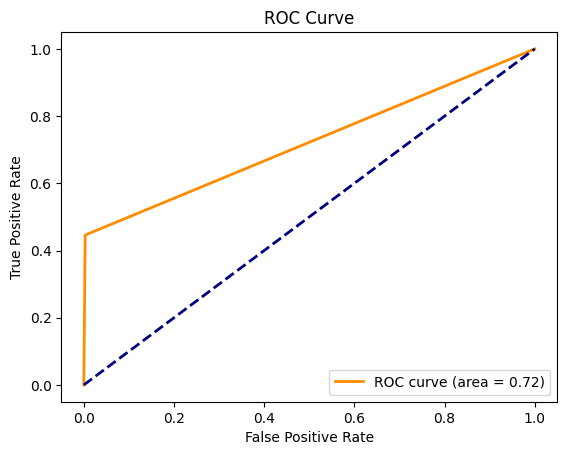

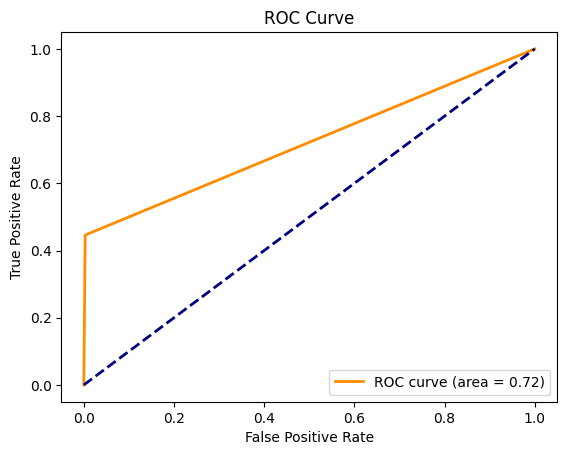

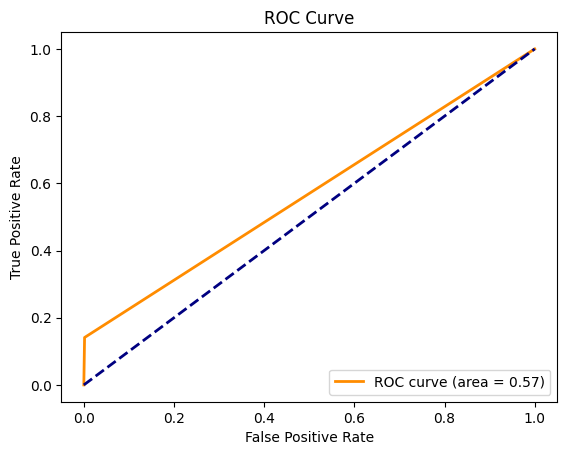

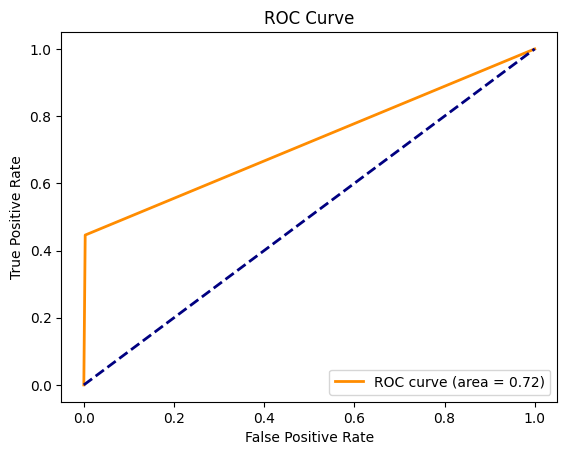

In [376]:
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y1_test, y1_pred3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# AUC ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred4)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Performance Scores of Test Data**

In [366]:
#Confusion Matrix
cm_rf = confusion_matrix(y1_test, y1_pred1)  #Model 1

cm_dt = confusion_matrix(y1_test, y1_pred2) #Model 2

cm_ada = confusion_matrix(y1_test, y1_pred3)#Model 3

cm_svc = confusion_matrix(y1_test, y1_pred4)#Model 4


# precision
prec_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[0][1])  #Model 1

prec_dt = cm_dt[0][0]*100/(cm_dt[0][0] + cm_dt[0][1])  #Model 2

prec_ada = cm_ada[0][0]*100/(cm_ada[0][0] + cm_ada[0][1])  #Model 3

prec_svc = cm_svc[0][0]*100/(cm_svc[0][0] + cm_svc[0][1])  #Model 4



# recall
recall_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[1][0])  #Model 1

recall_dt = cm_dt[0][0]*100/(cm_dt[0][0] + cm_dt[1][0]) #Model 2

recall_ada = cm_ada[0][0]*100/(cm_ada[0][0] + cm_ada[1][0])  #Model 3

recall_svc = cm_svc[0][0]*100/(cm_svc[0][0] + cm_svc[1][0])   #Model 4


# F-1 Score
f1_rf=2*prec_rf*recall_rf/(recall_rf + prec_rf)   #Model 1

f1_dt=2*prec_dt*recall_dt/(recall_dt + prec_dt)  #Model 2

f1_ada=2*prec_ada*recall_ada/(recall_ada + prec_ada)   #Model 3

f1_svc = 2*prec_svc*recall_svc/(recall_svc + prec_svc)   #Model 4



# False Negative Score
fnr_rf = cm_rf[1][0]*100/(cm_rf[0][0] + cm_rf[1][0])    #Model 1

fnr_dt = cm_dt[1][0]*100/(cm_dt[0][0] + cm_dt[1][0])  #Model 2

fnr_ada = cm_ada[1][0]*100/(cm_ada[0][0] + cm_ada[1][0])  #Model 3

fnr_svc = cm_svc[1][0]*100/(cm_svc[0][0] + cm_svc[1][0])  #Model 4




df2 = pd.DataFrame({'random forest':[mean_accuracy_rf,acc_rf1*100,prec_rf,recall_rf,f1_rf,fnr_rf,0.72],
                        'Decision Tree':[mean_accuracy_dt,acc_dt1*100,prec_dt,recall_dt,f1_dt,fnr_dt,0.72],
                       'Adaboost':[mean_accuracy_ad,acc_adaboost1*100,prec_ada,recall_ada,f1_ada,fnr_ada,0.57],
                      'SVC':[mean_accuracy_svc,acc_svc1*100,prec_svc,recall_svc,f1_svc,fnr_svc,0.72]
                      },index=['Training Accuracy','Testing Accuracy','Precision','Recall','F-1 Score','False Negative Rate', 'ROC curve area'])
df2

,random forest,Decision Tree,Adaboost,SVC
Training Accuracy,0.950000,0.960000,0.950000,0.940000
Testing Accuracy,98.351508,98.351508,97.738116,98.347248
Precision,99.698716,99.698716,99.834076,99.694350
Recall,98.626409,98.626409,97.889284,98.626350
F-1 Score,99.159664,99.159664,98.852115,99.157474
False Negative Rate,1.373591,1.373591,2.110716,1.373650
ROC curve area,0.720000,0.720000,0.570000,0.720000


**Comparing the performance visually**

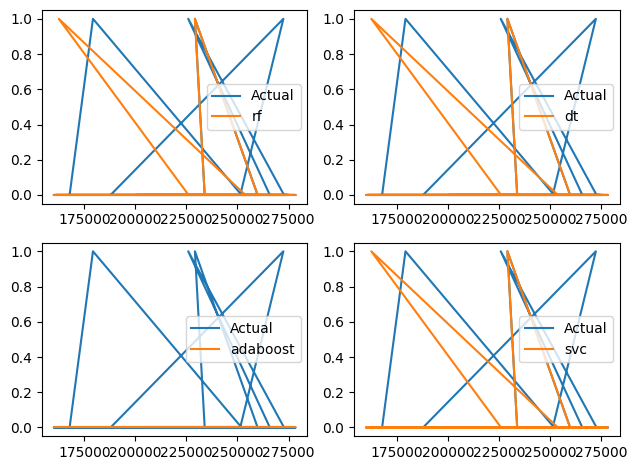

In [356]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:200],label='Actual')
plt.plot(df1['rf'].iloc[0:200],label="rf")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:200],label='Actual')
plt.plot(df1['dt'].iloc[0:200],label="dt")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:200],label='Actual')
plt.plot(df1['adaboost'].iloc[0:200],label="adaboost")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:200],label='Actual')
plt.plot(df1['svc'].iloc[0:200],label="svc")
plt.legend()

plt.tight_layout()

Observation:Model 1,2 & 4 seems to be working better

# **Binary Classification Cost Function for Comparision of models**

**Log Loss (Cross-Entropy Loss)**

In [372]:
#Cross-entropy for RandomForestClassifier
import numpy as np
from sklearn.metrics import log_loss


predicted_probs =y1_pred1
true_labels = y1_test

# Calculate cross-entropy using log_loss
cross_entropy = log_loss(true_labels, predicted_probs)
print(f"Cross-entropy: {cross_entropy:.4f}")


Cross-entropy: 0.5942


In [373]:
#Cross-entropy for DecisionTreeClassifier
import numpy as np
from sklearn.metrics import log_loss


predicted_probs =y1_pred2
true_labels = y1_test

# Calculate cross-entropy using log_loss
cross_entropy = log_loss(true_labels, predicted_probs)
print(f"Cross-entropy: {cross_entropy:.4f}")


Cross-entropy: 0.5942


In [374]:
#Cross-entropy for Adaboosterclassifier
import numpy as np
from sklearn.metrics import log_loss

predicted_probs =y1_pred3
true_labels = y1_test

# Calculate cross-entropy using log_loss
cross_entropy = log_loss(true_labels, predicted_probs)
print(f"Cross-entropy: {cross_entropy:.4f}")


Cross-entropy: 0.8153


In [375]:
#Cross-entropy for SVM
import numpy as np
from sklearn.metrics import log_loss

predicted_probs =y1_pred4
true_labels = y1_test

# Calculate cross-entropy using log_loss
cross_entropy = log_loss(true_labels, predicted_probs)
print(f"Cross-entropy: {cross_entropy:.4f}")


Cross-entropy: 0.5957


Observation: Model 1,2 & 4 seems to have almost same values.

# **Predict Corona for new patient**

In [361]:
data1={'Cough_symptoms':0, 'Fever':1,'Sore_throat':1, 'Shortness_of_breath':0,'Headache':1,'Known_contact':1}
df3=pd.DataFrame(data1,index=[0])
df3

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
0,0,1,1,0,1,1


In [362]:
new_pred=rf.predict(df3)
print(new_pred)              #sample prediction using Random forest classifier

[1]


0:corona Negative

1:Corona Positive

In [363]:
new_pred=dt.predict(df3)     #sample prediction using Decision tree classifier
print(new_pred)

[1]


In [364]:
new_pred=svc.predict(df3)      #sample prediction using SVM
print(new_pred)

[1]


All the three models are predicting the same

# **Conclusion**
As the input features which were used for training and testing are 4 categorical features with 2 categories for each, the results are found to be same after testing with the test dataset for Randomforestclassifier,Decisiontreeclassifier and SVM.

Despite of training the algorithms using k-fold cross validation, the precision, recall and balanced accuracy score values are found to be same for different machine learning techniques.

This situation is caused by the presence of asymptomatic covid cases in the data set.


The dataset is an imbalanced dataset with few targets as Covid Positive. Exploratory data analysis was performed to find the insights from the data and based on the results of chi2 feature selection method, 6 features were used to train the machine learning techniques.

Machine learning techniques like  Randomforestclassifier,Decision tree classifier,Adaboost classifier and SVM were used. These were trained and tested with the data and the results obtained after testing were compared above.

The models were trained using symptoms as variables but asymptomatic covid cases are also possible.

One can choose Randomforestclassifier or Decision tree classifier classifier or SVM model from the four used here, which resulted in predicting 50% of the covid positive cases with an accuracy of minimum 96% based on symptoms.